<a href="https://colab.research.google.com/github/Alex-Hoang666/AI/blob/main/Train_tien_viet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import thư viện
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array
#load folder datasets
folder = '/content/drive/MyDrive/Train/Tien_viet/'
#tiến hành tiền xử lý dữ liệu
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('5000 '):
    output = 1.0
  if file.startswith('10000 '):
    output = 2.0
  if file.startswith('20000 '):
    output = 3.0
  if file.startswith('50000 '):
    output = 4.0
  if file.startswith('100000 '):
    output = 5.0
  if file.startswith('200000 '):
    output = 6.0
  if file.startswith('500000 '):
    output = 7.0
  img =load_img(folder+file,target_size=(30,40))
  photo = img_to_array(img)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)
# lưu dữ liệu vừa xử lý
save('Tien_photos_train.npy',photos)
save('Tien_labels_train.npy',labels)

(360, 30, 40, 3) (360,)


In [ ]:
# kết nối với driver để load dữ liệu
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# tạo dữ liệu train
import numpy as np
x_train = np.load('/content/Tien_photos_train.npy')
y_train = np.load('/content/Tien_labels_train.npy')

In [ ]:
x_train = x_train.astype('float32')/255
from keras.utils import to_categorical
y_train = to_categorical(y_train,10)

In [ ]:
# tiến hành tích chập
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Normalization,LeakyReLU
from keras.optimizers import Adam

#32 lan tich chap
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu',input_shape=(30,40,3),padding='Same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

#64 lan tich chap
model.add(Conv2D(64,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

#128 lan tich chap
model.add(Conv2D(128,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

#256 lan tich chap
model.add(Conv2D(256,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))

from keras.losses import categorical_crossentropy
model.compile(loss = categorical_crossentropy,optimizer = Adam(),metrics=['accuracy'])
model.summary()
train = model.fit(x_train,y_train,batch_size=32,epochs = 100,verbose = 1)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 30, 40, 32)        896       
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 15, 20, 32)       0         
 g2D)                                                            
                                                                 
 dropout_47 (Dropout)        (None, 15, 20, 32)        0         
                                                                 
 conv2d_38 (Conv2D)          (None, 15, 20, 64)        18496     
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 8, 10, 64)        0         
 g2D)                                                            
                                                                 
 dropout_48 (Dropout)        (None, 8, 10, 64)       

In [ ]:
#lưu mô hình vừa train
model.save('Tien_viet_train.h5')

In [ ]:
#load mô hình 
from keras.models import load_model
model5=load_model('/content/drive/MyDrive/Train/Tien_viet_train.h5')

1/1 [==============================] - 0s 23ms/step


'100k'

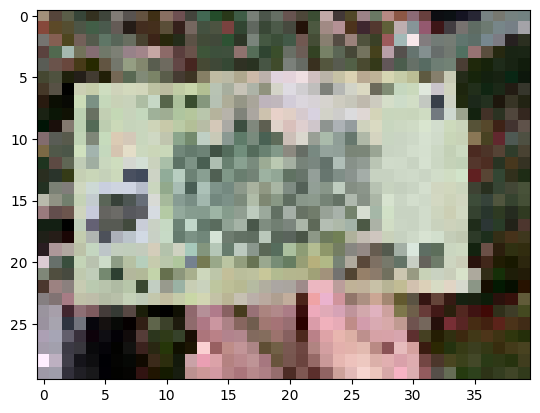

In [ ]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
vat = {1: '5k',2:'10k', 3:'20k', 4:'50k', 5:'100k', 6:'500k' }
img = load_img("/content/drive/MyDrive/100k.jpg",target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,30,40,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
vat[result[0]]